In [88]:
import ee
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely
import glob
import os
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib
import matplotlib.pyplot as plt

In [2]:
ee.Authenticate()

Enter verification code:  4/1AVHEtk5TBn39OzP8Bhs41ctImzNdE08hC7gwb7SnmVcfNG4KxHspFSPu9ao



Successfully saved authorization token.


In [3]:
from ee_download import download_image_by_asset_path, Curler

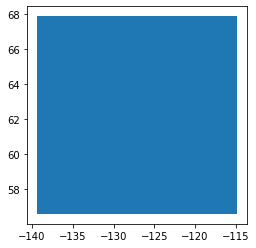

In [78]:
# create bbox

xmin = -139.3936913514372
ymin = 56.57864833838931
xmax = -114.82728842468266
ymax = 67.87397926052299


footprint = box(xmin, ymin, xmax, ymax)

poly = gpd.GeoDataFrame(pd.DataFrame(['box'], columns = ['geometry']),crs ='epsg:4326',geometry = [footprint])
poly.plot()
poly.to_file('/projects/Developer/icesat2_boreal/notebooks/radar_integration/Data/test_footprint.gpkg', driver='GPKG')


In [79]:
# import poly as if you have the data

gdf = gpd.read_file('/projects/Developer/icesat2_boreal/notebooks/radar_integration/Data/test_footprint.gpkg', crs='EPSG:4326')

In [80]:
gdf.bounds

,minx,miny,maxx,maxy
0,-139.393691,56.578648,-114.827288,67.873979


In [81]:
# make sub-footprint
cols = 91153
rows = 41812

minx = gdf.bounds.iloc[:,0][0]
miny = gdf.bounds.iloc[:,1][0]
maxx = gdf.bounds.iloc[:,2][0]
maxy = gdf.bounds.iloc[:,3][0]

In [82]:
minx, miny, maxx, maxy

(-139.3936913514372, 56.57864833838931, -114.82728842468266, 67.87397926052299)

In [104]:
sub_ftprint_nCols= (abs(minx - maxx)/91153)*10000
sub_ftprint_maxx = minx + sub_ftprint_nCols
sub_ftprint_maxx

-136.69861791153346

In [105]:
sub_ftprint_nRows = (abs(miny - maxy)/41812)*10000
sub_ftprint_maxy = miny + sub_ftprint_nRows
sub_ftprint_maxy

59.28010507859157

In [106]:
sub_ftprint_bbox = box(minx, miny, sub_ftprint_maxx, sub_ftprint_maxy)

In [107]:
sub_ftprint_bbox = gpd.GeoDataFrame(pd.DataFrame(['box'], columns = ['geometry']),crs ='epsg:4326',geometry = [sub_ftprint_bbox])



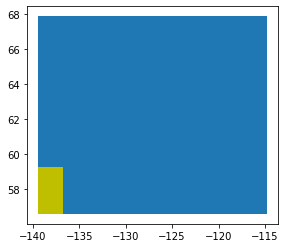

In [108]:
fig, ax = plt.subplots(1, 1)
gdf.plot(ax=ax)
sub_ftprint_bbox.plot(ax=ax, facecolor='y')

In [ ]:
# This will download all the tiles we need each to a zip, 
# the files inside are all named the same so next step is to overwrite that with the zip name

bbox_list = [sub_ftprint_bbox.bounds.iloc[:,0][0],sub_ftprint_bbox.bounds.iloc[:,1][0],sub_ftprint_bbox.bounds.iloc[:,2][0],sub_ftprint_bbox.bounds.iloc[:,3][0]]
bbox_list
gee_geom = ee.Geometry.Rectangle(bbox_list)
print(gee_geom)
    
downloaded_images = download_image_by_asset_path(
    asset_path = "projects/ee-foreststructure-above/assets/s1_vh_asc_pwr_frzn",
    output_folder = "/projects/Developer/icesat2_boreal/notebooks/radar_integration/",
    #region = gee_geom,
    #idx = str('test_file')
    )